In [1]:
import sys
sys.path.append('../src')

In [16]:
import encoder_decoder_uttt as ed
from alpha_net_uttt import ConnectNet
from utictactoe_board import board as c_board
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
net = ConnectNet()
cuda = torch.cuda.is_available()
if cuda:
    net.cuda()
net.eval()
net_filename = "../src/model_data/uttt_current_net__iter0.pth.tar"
checkpoint = torch.load(net_filename)
net.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [7]:
# file = "../src/datasets/dataset_iter0_cpu1_0_2021-05-07"
file = "../src/datasets/iter_0/dataset_iter0_cpu0_1_2021-05-09"
with open(file, 'rb') as f:
    data = pickle.load(f)

In [28]:
# for i in range(len(data)):
i = 30
s,p,value = data[i]
cboard = ed.decode_board(s)
# m,n = cboard.old_move
# if m != -1:
#     cboard.current_board[m,n] += '-'
# fig = view_board(cboard.current_board)
# fig.savefig(f"./pics/0509game_cpu0_iter0_num_{i:02}.png")
# plt.close()

In [29]:
cboard.current_board

array([['X', ' ', 'O', ' ', ' ', ' ', 'O', ' ', 'X'],
       ['O', 'O', 'O', ' ', ' ', 'X', ' ', ' ', ' '],
       ['X', ' ', 'X', ' ', ' ', ' ', 'X', 'O', ' '],
       ['X', ' ', 'X', 'O', ' ', ' ', 'X', ' ', ' '],
       ['O', 'X', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
       ['X', ' ', ' ', ' ', 'X', ' ', ' ', ' ', 'O'],
       ['O', ' ', 'O', ' ', 'O', ' ', 'X', ' ', 'X'],
       ['O', ' ', ' ', 'X', ' ', ' ', 'O', ' ', ' '],
       [' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']], dtype='<U32')

In [30]:
with torch.no_grad():
    encoded_s = ed.encode_board(cboard)
    encoded_s = encoded_s.transpose(2,0,1)
    encoded_s = torch.from_numpy(encoded_s).float().cuda()
    child_priors, value_estimate = net(encoded_s)
    child_priors = child_priors.detach().cpu().numpy().reshape(-1)
    value_estimate = value_estimate.item()

In [31]:
child_priors.shape

(81,)

In [32]:
p_mat = np.zeros((9,9))
for i in range(child_priors.shape[0]):
    m = i // 9
    n = i % 9
    p_mat[m,n] = child_priors[i]

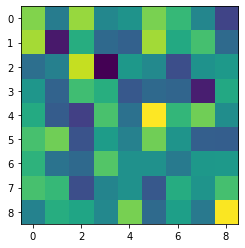

In [33]:
%matplotlib inline
plt.imshow(p_mat)
# plt.show()

In [19]:
p_mat

array([[0.01292576, 0.01218717, 0.01272827, 0.0123532 , 0.01237006,
        0.0126658 , 0.01259848, 0.01207942, 0.01229617],
       [0.01246561, 0.01180336, 0.01238806, 0.01187878, 0.01218279,
        0.01274816, 0.01254045, 0.01217338, 0.01212224],
       [0.01176017, 0.01203619, 0.01294183, 0.01157094, 0.01218566,
        0.012317  , 0.01196335, 0.01228812, 0.01240018],
       [0.01245654, 0.01192717, 0.01247529, 0.01271767, 0.01223555,
        0.01213427, 0.01242663, 0.01190281, 0.01277909],
       [0.01239258, 0.01204636, 0.01202393, 0.0128003 , 0.01230511,
        0.01279077, 0.01279298, 0.01274027, 0.0122522 ],
       [0.01245971, 0.0123626 , 0.01213452, 0.01240707, 0.01236769,
        0.01244864, 0.01225966, 0.0117161 , 0.01219309],
       [0.01243484, 0.01273084, 0.01211007, 0.01261716, 0.01232223,
        0.01239261, 0.01220441, 0.01229387, 0.0120737 ],
       [0.01291413, 0.01247979, 0.01224682, 0.01245411, 0.01276987,
        0.01218845, 0.01224879, 0.01222011, 0.01247357],


In [34]:
value_estimate

-0.038992416113615036